## Random Forest Regression Model for NBA Points

In [37]:
import pandas as pd

df = pd.read_csv('Updated_nba_working_data.csv')
df.head()


df = df.fillna(1)




In [38]:
df['total_points'] = df['home_statistics_points'] + df['away_statistics_points']
df = df[df['total_points'] >= 10]


In [39]:
#x = df.drop(columns = ['game_id', 'scheduled', 'home_name', 'away_name', 'home_statistics_points', 'away_statistics_points', 'total_points', 'home_wins', 'spread'])
x = df[['avg_home_spread', 'sum_home_spread', 'avg_home_statistics_points', 'sum_home_statistics_points', 'avg_home_statistics_points_in_paint', 'avg_home_statistics_assists', 'avg_home_statistics_offensive_rebounds', 'avg_home_statistics_field_goals_pct', 'avg_home_statistics_field_goals_made', 'avg_home_statistics_field_goals_att', 'avg_away_spread', 'sum_away_spread', 'avg_away_statistics_points', 'sum_away_statistics_points', 'avg_away_statistics_points_in_paint', 'avg_away_statistics_assists', 'avg_away_statistics_offensive_rebounds', 'avg_away_statistics_field_goals_pct', 'avg_away_statistics_field_goals_made','avg_away_statistics_field_goals_att']]
y = df['total_points']


In [40]:
x.head()

,avg_home_spread,sum_home_spread,avg_home_statistics_points,sum_home_statistics_points,avg_home_statistics_points_in_paint,avg_home_statistics_assists,avg_home_statistics_offensive_rebounds,avg_home_statistics_field_goals_pct,avg_home_statistics_field_goals_made,avg_home_statistics_field_goals_att,avg_away_spread,sum_away_spread,avg_away_statistics_points,sum_away_statistics_points,avg_away_statistics_points_in_paint,avg_away_statistics_assists,avg_away_statistics_offensive_rebounds,avg_away_statistics_field_goals_pct,avg_away_statistics_field_goals_made,avg_away_statistics_field_goals_att
0,-3.2,-16.0,119.0,595.0,46.4,25.4,6.6,50.60,44.0,87.4,4.6,23.0,112.20,561.0,53.2,24.4,6.4,49.22,43.6,88.40
1,3.0,15.0,115.0,575.0,54.0,31.0,7.4,48.72,42.0,86.6,-6.5,-26.0,114.25,457.0,44.5,23.0,8.5,47.60,40.5,85.25
2,-7.6,-38.0,99.6,498.0,48.4,24.4,9.2,44.30,39.4,88.6,1.0,5.0,105.60,528.0,46.0,21.8,9.8,45.04,38.6,86.40
3,-0.4,-2.0,102.6,513.0,46.0,27.6,11.8,46.20,38.8,84.2,1.2,6.0,103.40,517.0,35.6,22.4,13.0,43.12,37.2,87.60
4,1.2,6.0,103.4,517.0,46.4,21.6,13.2,44.58,38.0,85.8,-6.4,-32.0,103.40,517.0,40.0,22.8,10.4,46.28,35.4,76.40


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=45)

In [42]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
from sklearn.metrics import mean_absolute_error
y_pred_train = reg.predict(X_train)
mean_absolute_error(y_train, y_pred_train)

4.605172334589565

In [44]:
y_pred_test = reg.predict(X_test)

mean_absolute_error(y_test, y_pred_test)

12.146505665475695

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators' : [125, 130, 135],
              'max_depth' : [18, 22, 24], 
              'max_features' : [10, 11, 12],
              'max_leaf_nodes' : [86, 88, 90]
                }

reg1 = RandomForestRegressor()
reg1 = GridSearchCV(reg1, parameters)

In [46]:
reg1.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [18, 22, 24],
                         'max_features': [10, 11, 12],
                         'max_leaf_nodes': [86, 88, 90],
                         'n_estimators': [125, 130, 135]})

In [47]:
y_pred_train2 = reg1.predict(X_train)
mean_absolute_error(y_train, y_pred_train2)

11.448835043159914

In [48]:
y_pred_test2 = reg1.predict(X_test)
mean_absolute_error(y_test, y_pred_test2)

12.059453817245966

In [49]:
reg1.best_params_

{'max_depth': 18,
 'max_features': 12,
 'max_leaf_nodes': 86,
 'n_estimators': 130}

In [50]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(y_train, y_pred_train2))
print(r2_score(y_train, y_pred_train2))

207.4374826733484
0.5707589825374368


In [51]:
print(mean_squared_error(y_test, y_pred_test2))
print(r2_score(y_test,y_pred_test2))

233.42268655275106
0.5179839092413464


In [52]:
feature_importance = reg.feature_importances_


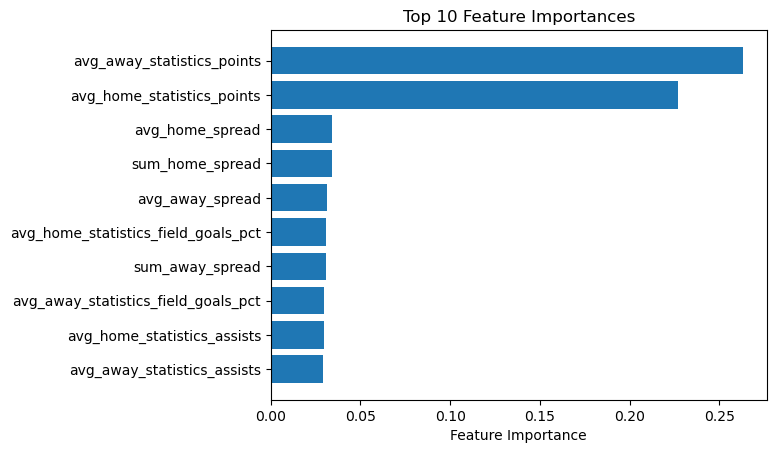

In [53]:
import matplotlib.pyplot as plt

# Example: Plot top 10 features
sorted_idx = reg.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx[-10:]], reg.feature_importances_[sorted_idx[-10:]])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.show()


In [54]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator= reg, n_features_to_select=20)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected Features: ", selected_features)

Selected Features:  Index(['avg_home_spread', 'sum_home_spread', 'avg_home_statistics_points',
       'sum_home_statistics_points', 'avg_home_statistics_points_in_paint',
       'avg_home_statistics_assists', 'avg_home_statistics_offensive_rebounds',
       'avg_home_statistics_field_goals_pct',
       'avg_home_statistics_field_goals_made',
       'avg_home_statistics_field_goals_att', 'avg_away_spread',
       'sum_away_spread', 'avg_away_statistics_points',
       'sum_away_statistics_points', 'avg_away_statistics_points_in_paint',
       'avg_away_statistics_assists', 'avg_away_statistics_offensive_rebounds',
       'avg_away_statistics_field_goals_pct',
       'avg_away_statistics_field_goals_made',
       'avg_away_statistics_field_goals_att'],
      dtype='object')
